<a href="https://colab.research.google.com/github/mehrgh15/LinearRegressionProject/blob/main/LinearRegExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [ ]:
poly_features = poly_converter.transform(X)

In [ ]:
#poly_features = poly_converter.fit_transform(X)

In [ ]:
X.shape

(200, 3)

In [ ]:
poly_features.shape

(200, 9)

In [ ]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [ ]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
MAE

0.5475837919149621

In [ ]:
MSE

0.4603062493888297

In [ ]:
RMSE

0.6784587307926914

In [ ]:
train_rsme_error = []
test_rsme_error = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33,random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rsme = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rsme = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rsme_error.append(train_rsme)
    test_rsme_error.append(test_rsme)

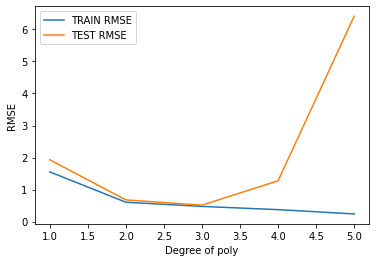

In [ ]:
plt.plot(range(1,6), train_rsme_error[:5], label="TRAIN RMSE")
plt.plot(range(1,6), test_rsme_error[:5], label="TEST RMSE")
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()